# Anomaly Detection in Network Traffic using Machine Learning Algorithms


## Bachelor Thesis
## Constructor University Bremen
## BSc in Computer Science

### 31 January 2025

# Introduction

This research explores the effectiveness of machine learning algorithms in detecting anomalies within network traffic. This notebook employs the raw data of the UNSW-NB15 dataset to evaluate the performance of several machine learning algorithm, including Logistic Regression, Decision Tree, Random Forests and Support Vector Machine (SVM).  

Comprehensive preprocessing and operations are conducted in this notebook:
- Data cleaning
- Data normalization
- Feature selection 
- Data splitting
- Cross validation


# 1. Library Import

In [4]:
# data processing and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# data training model and classifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# performance metrics
from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")



# 2. Data Loading

In [6]:
# load the UNSW-NB15 dataset (Put the datasets in the same working directory)
# 4 CSV files are provided. The 4 files are merged to a single data set 
## Due to file and memory size, this notebook will load one of the 4 files only 
# Reading datasets (in same working directory)
dfs = []
##for i in range(1,5):  # use this statement when need to load all 4 files 
for i in range(1,2):    # 5 -> 2
    path = 'UNSW-NB15_{}.csv'                       # load the input csv files one by one
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
data = pd.concat(dfs).reset_index(drop=True)        # merge all files into a single dataframe

In [8]:
# Get the feature names from the features csv
df_col = pd.read_csv('NUSW-NB15_features.csv', encoding='ISO-8859-1')

# Make column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

# Rename our dataframe with proper column names
data.columns = df_col['Name']

In [10]:
# Show the shape of dataset (row and columns)
data.shape

(700001, 49)

In [12]:
# Show the data info and content of dataset
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  sload             700001 non-null  float64
 15  dload             700001 non-null  float64
 16  spkts             70

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,8,20,7,5,1,1,4,NaN,0
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,1,1,2,7,2,2,2,NaN,0
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,13,13,6,7,2,1,2,NaN,0
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,10,13,6,5,1,1,3,NaN,0


# 3. Data Cleaning

In [56]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# data
#data = load_data.dropna()

In [57]:
# check for null values
data.isnull().sum()

Name
srcip                    0
sport                    0
dstip                    0
dsport                   0
proto                    0
state                    0
dur                      0
sbytes                   0
dbytes                   0
sttl                     0
dttl                     0
sloss                    0
dloss                    0
service                  0
sload                    0
dload                    0
spkts                    0
dpkts                    0
swin                     0
dwin                     0
stcpb                    0
dtcpb                    0
smeansz                  0
dmeansz                  0
trans_depth              0
res_bdy_len              0
sjit                     0
djit                     0
stime                    0
ltime                    0
sintpkt                  0
dintpkt                  0
tcprtt                   0
synack                   0
ackdat                   0
is_sm_ips_ports          0
ct_state_ttl           

In [58]:
# Remove null values
data['ct_flw_http_mthd']=data.ct_flw_http_mthd.fillna(value=0)
data['is_ftp_login']=(data.is_ftp_login.fillna(value=0)).astype(int)

# fill 'normal' value for null values in attack_cat column, and remove spaces and change to lower cases
data['attack_cat'] = data.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [59]:
# check for null values after remove
data.isnull().sum()

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

In [60]:
# Show the data info 
print("Dataset Information")
print(data.info())
print("\nShow the first few rows of the Dataset")
print(data.head())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Int64Index: 640788 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             640788 non-null  object 
 1   sport             640788 non-null  object 
 2   dstip             640788 non-null  object 
 3   dsport            640788 non-null  object 
 4   proto             640788 non-null  object 
 5   state             640788 non-null  object 
 6   dur               640788 non-null  float64
 7   sbytes            640788 non-null  int64  
 8   dbytes            640788 non-null  int64  
 9   sttl              640788 non-null  int64  
 10  dttl              640788 non-null  int64  
 11  sloss             640788 non-null  int64  
 12  dloss             640788 non-null  int64  
 13  service           640788 non-null  object 
 14  sload             640788 non-null  float64
 15  dload             640788 non-null  float64
 16  

# 4. About the Data

### Show the distribution of the attack category and normal class (non-attack data)
### Show the number of the attack category and normal class (non-attack data)


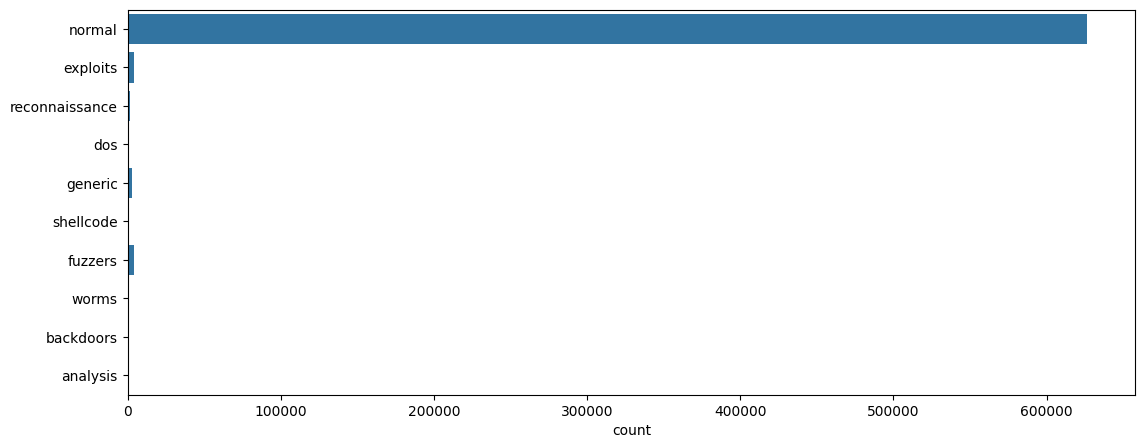

In [61]:
# Show distribution of attack category and normal class (non-attack data)
plt.figure(figsize=(13,5))
sns.countplot(data['attack_cat'].values,label="Sum")
plt.show()


In [62]:
# show the number of the values (normal 0 and abnormal 1)
data['label'].value_counts() 


0    626510
1     14278
Name: label, dtype: int64

In [63]:
# Show the number of attack_cat 

data['attack_cat'].value_counts()

normal            626510
exploits            4042
fuzzers             3991
generic             2833
reconnaissance      1740
dos                  825
analysis             301
backdoors            299
shellcode            223
worms                 24
Name: attack_cat, dtype: int64

# 5. Split the dataset into training and testing sets (80-20)

In [64]:
# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [65]:
print('\nShow the shape of the training and testing datasets after data splitting, rows and columns')
print(train.shape,'\n',test.shape)


Show the shape of the training and testing datasets after data splitting, rows and columns
(512630, 49) 
 (128158, 49)


In [66]:
# Create the x and y training and testing set from the train and test dataset, drop the label and attack_cat column from training
# x_train, y_train = train.drop(columns=['label','attack_cat']), train['label'] - original code
# x_test, y_test = test.drop(columns=['label','attack_cat']), test['label']

x_train, y_train = train.drop(columns=['label','attack_cat','srcip','sport','dstip','dsport','proto','state','service']), train['label']
x_test, y_test = test.drop(columns=['label','attack_cat','srcip','sport','dstip','dsport','proto','state','service']), test['label']

In [67]:
print ('\nShow the shape of the x and y training and testing dataset after dropped the Label and attack_cat column')
print(x_train.shape,'\n',y_train.shape)
print()
print(x_test.shape,'\n',y_test.shape)


Show the shape of the x and y training and testing dataset after dropped the Label and attack_cat column
(512630, 40) 
 (512630,)

(128158, 40) 
 (128158,)


In [68]:
print('\nShow the data info of the x_training dataset')
x_train.head()


Show the data info of the x_training dataset


Name,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
276731,1.073962,1580,10168,31,29,3,5,1.079368e+04,7.154071e+04,12,...,1,0,0,2,4,2,2,1,1,1
411162,0.001699,520,304,31,29,0,0,1.836374e+06,1.073573e+06,4,...,0,0,0,2,3,3,2,1,1,2
502357,0.054034,4862,79236,31,29,7,36,7.114039e+05,1.159492e+07,84,...,0,0,0,4,5,3,3,1,1,1
63794,1.044222,1684,10168,31,29,3,5,1.198213e+04,7.357823e+04,14,...,1,0,0,3,3,8,3,1,1,1
450266,0.510301,568,312,31,29,0,0,6.678412e+03,3.668423e+03,4,...,0,0,0,9,11,7,6,1,1,2


In [69]:
y_train.head()

276731    0
411162    0
502357    0
63794     0
450266    0
Name: label, dtype: int64

# 6. Feature Selection - Correlation Analysis 

In [70]:
# Function to find the correlation between two feature columns

def corr(col1, col2="label", df=x_train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

In [71]:
# Find the features with high correlation and Remove them (with correlation > 0.9)
# https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
co_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = co_matrix.where(np.triu(np.ones(co_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [72]:
print('\nShow list of features with high correlation')
print(to_drop)


Show list of features with high correlation
['sloss', 'dloss', 'dpkts', 'dwin', 'ltime', 'synack', 'ackdat']


In [73]:
# remove the highly correlated features from x_train and x_test
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

In [74]:
print('\nShow the shape of the trainnig and testing x dataset after removing the highly correlated features')
x_train.shape, x_test.shape


Show the shape of the trainnig and testing x dataset after removing the highly correlated features


((512630, 33), (128158, 33))

# 7. Normalize the features (Standardize numeric columns)

In [75]:
# find numeric feature columns
num_col = x_train.select_dtypes(include=np.number).columns

In [76]:
# Standardizing the data (data normalization)
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])

In [77]:
x_train[num_col] = scaler.transform(x_train[num_col])

In [78]:
x_train.head()

Name,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
276731,0.024364,-0.071500,-0.196296,-0.16134,-0.117144,-0.088238,-0.664300,-0.368507,0.634533,-0.013747,...,1.245289,-0.130863,-0.110529,-0.860792,-0.388227,-0.594912,-0.668668,-0.32829,-0.203848,-0.557761
411162,-0.036684,-0.093949,-0.253593,-0.16134,-0.117144,-0.048941,-0.443340,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,-0.860792,-0.627582,-0.239684,-0.668668,-0.32829,-0.203848,0.072335
502357,-0.033705,-0.001996,0.204902,-0.16134,-0.117144,-0.073157,1.876739,0.579656,0.634533,-0.780141,...,-0.207205,-0.130863,-0.110529,-0.423543,-0.148872,-0.239684,-0.357930,-0.32829,-0.203848,-0.557761
63794,0.022671,-0.069298,-0.196296,-0.16134,-0.117144,-0.088213,-0.663851,-0.342169,0.634533,1.897410,...,1.245289,-0.130863,-0.110529,-0.642168,-0.627582,1.536456,-0.357930,-0.32829,-0.203848,-0.557761
450266,-0.007728,-0.092932,-0.253547,-0.16134,-0.117144,-0.088327,-0.679267,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,0.669581,1.287257,1.181228,0.574282,-0.32829,-0.203848,0.072335


In [79]:
x_test.head()

Name,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
410480,0.049228,2542,22432,31,29,4.028602e+05,3.558625e+06,40,255,499893060,...,0,0,0,9,4,2,4,1,1,2
118551,0.012943,2646,24316,31,29,1.596539e+06,1.468840e+07,42,255,1901283801,...,0,0,0,7,8,6,2,1,1,1
525054,0.026793,3680,2560,31,29,1.037883e+06,7.261598e+05,18,255,2874603932,...,0,0,0,3,7,2,1,1,1,1
246600,0.025535,1540,1644,31,29,4.523987e+05,4.865479e+05,16,255,3352804432,...,0,0,0,8,6,1,5,1,1,1
231871,0.001023,146,178,31,29,5.708700e+05,6.959922e+05,2,0,0,...,0,0,0,3,2,3,2,1,1,1


# 8. Encode Category Columns (Failed)

In [80]:
# find category feature columns 
cat_col = x_train.select_dtypes(exclude=np.number).columns

In [81]:
cat_col

Index([], dtype='object', name='Name')

In [82]:
x_train.head()

Name,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
276731,0.024364,-0.071500,-0.196296,-0.16134,-0.117144,-0.088238,-0.664300,-0.368507,0.634533,-0.013747,...,1.245289,-0.130863,-0.110529,-0.860792,-0.388227,-0.594912,-0.668668,-0.32829,-0.203848,-0.557761
411162,-0.036684,-0.093949,-0.253593,-0.16134,-0.117144,-0.048941,-0.443340,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,-0.860792,-0.627582,-0.239684,-0.668668,-0.32829,-0.203848,0.072335
502357,-0.033705,-0.001996,0.204902,-0.16134,-0.117144,-0.073157,1.876739,0.579656,0.634533,-0.780141,...,-0.207205,-0.130863,-0.110529,-0.423543,-0.148872,-0.239684,-0.357930,-0.32829,-0.203848,-0.557761
63794,0.022671,-0.069298,-0.196296,-0.16134,-0.117144,-0.088213,-0.663851,-0.342169,0.634533,1.897410,...,1.245289,-0.130863,-0.110529,-0.642168,-0.627582,1.536456,-0.357930,-0.32829,-0.203848,-0.557761
450266,-0.007728,-0.092932,-0.253547,-0.16134,-0.117144,-0.088327,-0.679267,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,0.669581,1.287257,1.181228,0.574282,-0.32829,-0.203848,0.072335


In [83]:
## x_train['proto'].value_counts()

In [84]:
## x_train1 = x_train.dropna()
## x_train1.shape

In [85]:
# removing all the "-" and replacing those with "None"
## x_train['service'] = x_train['service'].apply(lambda x:"None" if x=="nan" else x)

In [86]:
# Onehot Encoding
## service_ = OneHotEncoder()
## proto_ = OneHotEncoder()
## state_ = OneHotEncoder()
## ohe_service = service_.fit(x_train.service.values.reshape(-1,1))
## ohe_proto = proto_.fit(x_train.proto.values.reshape(-1,1))
## ohe_state = state_.fit(x_train.state.values.reshape(-1,1))

In [87]:
# We are onehot encoding the given column
# Remove the original categorical column
## for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
##    x = ohe.transform(x_train[col].values.reshape(-1,1))
##    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
##    x_train = pd.concat([x_train.drop(col, axis=1), tmp_df], axis=1)

In [88]:
x_train.head()

Name,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
276731,0.024364,-0.071500,-0.196296,-0.16134,-0.117144,-0.088238,-0.664300,-0.368507,0.634533,-0.013747,...,1.245289,-0.130863,-0.110529,-0.860792,-0.388227,-0.594912,-0.668668,-0.32829,-0.203848,-0.557761
411162,-0.036684,-0.093949,-0.253593,-0.16134,-0.117144,-0.048941,-0.443340,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,-0.860792,-0.627582,-0.239684,-0.668668,-0.32829,-0.203848,0.072335
502357,-0.033705,-0.001996,0.204902,-0.16134,-0.117144,-0.073157,1.876739,0.579656,0.634533,-0.780141,...,-0.207205,-0.130863,-0.110529,-0.423543,-0.148872,-0.239684,-0.357930,-0.32829,-0.203848,-0.557761
63794,0.022671,-0.069298,-0.196296,-0.16134,-0.117144,-0.088213,-0.663851,-0.342169,0.634533,1.897410,...,1.245289,-0.130863,-0.110529,-0.642168,-0.627582,1.536456,-0.357930,-0.32829,-0.203848,-0.557761
450266,-0.007728,-0.092932,-0.253547,-0.16134,-0.117144,-0.088327,-0.679267,-0.473858,-1.575987,-1.070473,...,-0.207205,-0.130863,-0.110529,0.669581,1.287257,1.181228,0.574282,-0.32829,-0.203848,0.072335


# 9. Model Training with Machine Learning Algorithms 

In [89]:
## x_train_transform = x_train.to_numpy()

In [90]:
## x_train_transform.shape

In [91]:
## x_train_transform

In [92]:
##x_test_transform = x_test.to_numpy()

In [93]:
##y_train_transform = y_train.to_numpy()

In [94]:
##y_test_transform = y_test.to_numpy()

In [95]:
# ===== Step 1: cross-validation ======== Logistic Regression
# define a Logistic Regression classifier
clf = LogisticRegression(solver='lbfgs', random_state=123, max_iter = 4000)

# define  Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# define metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 10-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [96]:
cv_results

{'fit_time': array([2.2419188 , 2.71668243, 5.34337401, 5.70867324, 1.80791879,
        5.16456103, 2.41596985, 2.27561188, 6.06590486, 1.90283322]),
 'score_time': array([0.06957769, 0.03805566, 0.04690075, 0.04748034, 0.05548954,
        0.078619  , 0.13168073, 0.06310606, 0.06905699, 0.04691505]),
 'test_accuracy': array([0.99260675, 0.99325049, 0.99268478, 0.99338704, 0.99317246,
        0.99301641, 0.99305542, 0.9935431 , 0.99305542, 0.99282133]),
 'test_precision': array([0.80221519, 0.81956696, 0.79813665, 0.81955485, 0.81593625,
        0.80688038, 0.81155978, 0.82171157, 0.80862745, 0.80265211]),
 'test_recall': array([0.88713911, 0.89413823, 0.89938758, 0.90201225, 0.89588801,
        0.90288714, 0.8967629 , 0.90726159, 0.90201225, 0.89947552]),
 'test_f1': array([0.84254258, 0.85523013, 0.84574249, 0.85880883, 0.85404504,
        0.85218827, 0.85203658, 0.86237006, 0.85277089, 0.84830998]),
 'test_roc_auc': array([0.99788672, 0.99824982, 0.99811422, 0.99831744, 0.99786905,
 

In [97]:
cv_results['test_accuracy'].mean()

0.9930593215379513

In [98]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)
y_pred_score = clf.predict_proba(X=x_test)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.50000 ROC AUC on the test set.
The precision score on the test set: 0.00000
The recall score on the test set: 0.00000
Confusion Matrix:
 [[125311      0]
 [  2847      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    125311
           1       0.00      0.00      0.00      2847

    accuracy                           0.98    128158
   macro avg       0.49      0.50      0.49    128158
weighted avg       0.96      0.98      0.97    128158



# Decision Tree

In [99]:
# ===== Step 1: cross-validation ======== Decision Tree
# define a Decision Tree
# clf = LogisticRegression(solver='lbfgs', random_state=123, max_iter = 4000)
# clf = DecisionTreeClassifier(random_state=123)
clf = RandomForestClassifier(random_state=123)

# define  Stratified 10-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# define metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=x_train,
                            y=y_train,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [100]:
cv_results

{'fit_time': array([34.94192958, 32.56101322, 31.67349625, 34.35099459, 30.41603851,
        32.85341597, 35.25949788, 33.99003291, 31.90687203, 30.11942101]),
 'score_time': array([0.25145507, 0.22667384, 0.22042418, 0.23536563, 0.25123954,
        0.23600078, 0.25185132, 0.22011733, 0.23585939, 0.22012949]),
 'test_accuracy': array([0.99801026, 0.99853696, 0.99818583, 0.99816632, 0.99830287,
        0.99814681, 0.99826386, 0.99853696, 0.99820533, 0.99849794]),
 'test_precision': array([0.94832041, 0.95876289, 0.94871795, 0.95411255, 0.95051195,
        0.93739566, 0.94812925, 0.9533107 , 0.94723404, 0.95559351]),
 'test_recall': array([0.96325459, 0.97637795, 0.97112861, 0.96412948, 0.97462817,
        0.98250219, 0.97550306, 0.98250219, 0.97375328, 0.97814685]),
 'test_f1': array([0.95572917, 0.96749025, 0.95979248, 0.95909487, 0.96241901,
        0.95941905, 0.96162139, 0.96768634, 0.96031061, 0.96673866]),
 'test_roc_auc': array([0.99986705, 0.99991754, 0.99984247, 0.99986094, 0.9

In [101]:
cv_results['test_accuracy'].mean()

0.9982853129937773

In [102]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
clf.fit(X=x_train, y=y_train)

# predition on testing data
y_pred_class = clf.predict(X=x_test)
y_pred_score = clf.predict_proba(X=x_test)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y_test, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y_test, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y_test, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y_test, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y_test, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.72865 ROC AUC on the test set.
The precision score on the test set: 0.71482
The recall score on the test set: 0.40323
Confusion Matrix:
 [[124853    458]
 [  1699   1148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    125311
           1       0.71      0.40      0.52      2847

    accuracy                           0.98    128158
   macro avg       0.85      0.70      0.75    128158
weighted avg       0.98      0.98      0.98    128158



# 8. Performance Evaluation 

# 9. Analysis 